In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#read the file
    
data = pd.read_table('6119-hybridOut-June17-27.txt', skiprows=1)

#drop columns with NaN

data = data.dropna(axis='columns', how ='all')

#fix the headers

data = data.rename({'Event': 'Event', 'MinFracDay': 'NmHitDAQ1', \

                   'JulDay':'MinFracDay','Unnamed: 6':'JulDay', \

                   'Unnamed: 8':'SSDB', 'Unnamed: 10':'Hit1.ch1', \

                   'Unnamed: 13':'Hit1.ch2','Unnamed: 16':'Hit1.ch3', \

                   'Unnamed: 19':'Hit1.ch4','Unnamed: 22':'Hit2.ch1', \

                   'Unnamed: 25':'Hit2.ch2','Unnamed: 28':'Hit2.ch3', \

                   'Unnamed: 31':'Hit2.ch4'

                   },

                  axis=1)
cols = data.columns

cols = cols.map(lambda x: x.replace('#', '_') if isinstance(x, (str or unicode)) else x)

data.columns = cols

data.head(3)

,Event,NmHitDAQ1,MinFracDay,JulDay,SSDB,eventDateTime,Hit1.ch1,PW1,Hit1.ch2,PW2,...,Hit1.ch4,PW4,Hit2.ch1,PW1.1,Hit2.ch2,PW2.1,Hit2.ch3,PW3.1,Hit2.ch4,PW4.1
0,1,4,0.500012,2459747,43201.03,6/17/2022 0:0:1,0.00,17.50,2.50,25.00,...,3.0,25.01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2,4,0.500012,2459747,43201.07,6/17/2022 0:0:1,0.75,22.49,0.75,23.75,...,0.0,23.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,3,2,0.500013,2459747,43201.16,6/17/2022 0:0:1,-1.00,-1.00,-1.00,-1.00,...,0.0,32.50,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


New Mean is 4.238023141245303
New Standard Deviation is 2.5648528377844584
New Outlier length is 114687
Number of Signal Events 117


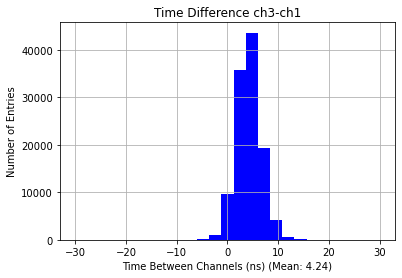

In [2]:
#Creating New Filter Columns
data['Filter_1'] = data.iloc[:, 6] != -1  
data['Filter_2'] = data.iloc[:, 8] != -1
data['Filter_3'] = data.iloc[:, 10] != -1 
data['Filter_4'] = data.iloc[:, 12] != -1 

#data.head(5)

filter_to_data = data.query('Filter_1 == True and Filter_3 == True and Filter_2 == True and Filter_4 == True')

#Creating a new Delta_T Column (Calculates difference in two different channel hit columns)
filter_to_data['Delta_T'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch1'])

#data.head(3)


no_outlier_data = list(filter(lambda x: x < 30 and x > -30, filter_to_data['Delta_T'])) #Filters out outliers in calculations
#2 Sigma Cut 
signal_region = list(filter(lambda x: x < -5.2 and x > -15.2, filter_to_data['Delta_T'])) #Focuses on Signal Region  
#1 sigma Cut
#signal_region = list(filter(lambda x: x < -7.7 and x > -12.7, filter_to_data['Delta_T'])) 


print("New Mean is " + str(np.mean(no_outlier_data)))
print("New Standard Deviation is " + str(np.std(no_outlier_data)))
print("New Outlier length is " + str(np.size(no_outlier_data)))
print("Number of Signal Events " + str(np.size(signal_region)))

#Finding the min and max value in Delta_T column
x_max = max(filter_to_data['Delta_T'])
x_min = min(filter_to_data['Delta_T'])

#Setting the x limits as -30 to 30 on Graph
if(x_max > 30):
    x_max = 30   
    
if(x_min < -30):
    x_min = -30

#Plotting Histogram
plt.hist(filter_to_data['Delta_T'], bins=25, range=[x_min,x_max], log=False, color = "blue")  # makes the histogram
plt.title("Time Difference ch3-ch1")

#Rounding the mean on graph
new_mean = round(np.mean(no_outlier_data), 2)

plt.xlabel("Time Between Channels (ns) (Mean: " + str(new_mean) + ")")
plt.ylabel("Number of Entries")
plt.grid(True);



(array([2.0000e+00, 0.0000e+00, 2.0000e+00, 6.0000e+00, 3.0000e+00,
        4.0000e+00, 7.0000e+00, 7.0000e+00, 2.4000e+01, 2.6000e+01,
        1.4400e+02, 1.1130e+03, 9.7280e+03, 3.5667e+04, 4.3615e+04,
        1.9412e+04, 4.2160e+03, 5.5800e+02, 1.1100e+02, 1.1000e+01,
        1.9000e+01, 7.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-30. , -27.6, -25.2, -22.8, -20.4, -18. , -15.6, -13.2, -10.8,
         -8.4,  -6. ,  -3.6,  -1.2,   1.2,   3.6,   6. ,   8.4,  10.8,
         13.2,  15.6,  18. ,  20.4,  22.8,  25.2,  27.6,  30. ]),
 <BarContainer object of 25 artists>)

Text(0.5, 1.0, 'Time Difference ch3-ch1')

Text(0.5, 0, 'Time Between Channels (ns) (Mean: 4.24)')

Text(0, 0.5, 'Number of Entries')

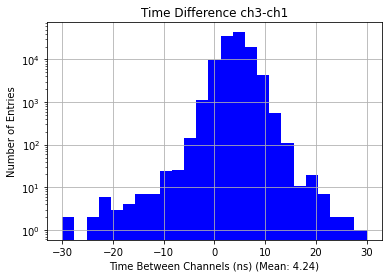

In [3]:
#Plotting the Graph in Log Scale
#Log can be useful to see the full distribution

plt.hist(filter_to_data['Delta_T'], bins=25, range=[x_min,x_max], log=False, color = "blue")  # makes the histogram
plt.title("Time Difference ch3-ch1")

new_mean = round(np.mean(no_outlier_data), 2)

plt.xlabel("Time Between Channels (ns) (Mean: " + str(new_mean) + ")")
plt.ylabel("Number of Entries")
plt.grid(True);
plt.yscale('log') 

New mean is 1.0487575739082675
New standard deviation is 1.8456959071125276
New Outlier length is 114703
Number of Signal Events 792


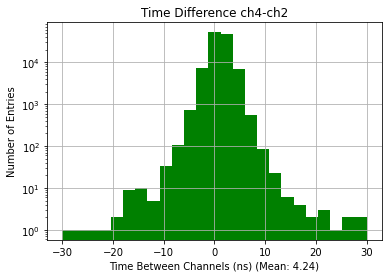

In [4]:
#Graphing a Different Set of Counters


filter_to_data['Delta_T'] = (filter_to_data['Hit1.ch4'] - filter_to_data['Hit1.ch2'])


no_outlier_data = list(filter(lambda x: x < 21 and x > -19, filter_to_data['Delta_T'])) #Filters out outliers in calculations
signal_region = list(filter(lambda x: x < -3.3  and x > -7.3, filter_to_data['Delta_T'])) #Focuses on Signal Region

print("New mean is " + str(np.mean(no_outlier_data)))
print("New standard deviation is " + str(np.std(no_outlier_data)))
print("New Outlier length is " + str(np.size(no_outlier_data)))
print("Number of Signal Events " + str(np.size(signal_region)))

x_max = max(filter_to_data['Delta_T'])
x_min = min(filter_to_data['Delta_T'])

if(x_max > 30):
    x_max = 30   
    
if(x_min < -30):
    x_min = -30

plt.hist(filter_to_data['Delta_T'], bins=25, range=[x_min,x_max], log=False, color = "green")  # makes the histogram
plt.title("Time Difference ch4-ch2")
plt.xlabel("Time Between Channels (ns) (Mean: " + str(new_mean) + ")")
plt.yscale('log') #Remember you can always change from log to linear
plt.ylabel("Number of Entries")
plt.grid(True);
